In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Problem 1

Matthew Xu 5752811

In [3]:
table1 = pd.read_csv('table1.csv')
table2 = pd.read_csv('table2.csv')

#Using table 1 only, table 1 does not have native country 
#Use Race, Sex, and Occuptation to identify education and martial status
var1 = table1.loc[(table1['sex'] == 'Female') & (table1['race'] == 'Asian-Pac-Islander') & (table1['occupation'] == 'Craft-repair')] 
iden1 = var1[['education','marital-status']]
print(iden1)

var2 = table2.loc[(table2['native-country'] == 'Philippines') & (table2['race'] == 'Asian-Pac-Islander') & (table2['occupation'] == 'Craft-repair') & (table2['sex'] == 'Female')] 
print(var2)
print(var1)


          education         marital-status
920         Masters     Married-civ-spouse
4804        HS-grad                Widowed
9600        HS-grad               Divorced
10084     Bachelors  Married-spouse-absent
10476  Some-college          Never-married
11961  Some-college          Never-married
12627    Assoc-acdm  Married-spouse-absent
14697          11th  Married-spouse-absent
16440       HS-grad               Divorced
16742  Some-college          Never-married
19175       HS-grad          Never-married
20140       HS-grad               Divorced
25122  Some-college                Widowed
31602       HS-grad          Never-married
       age    occupation                race     sex  capital-gain  \
29431   59  Craft-repair  Asian-Pac-Islander  Female             0   

       capital-loss  hours-per-week native-country income  
29431             0              35    Philippines  <=50K  
       age    occupation     education  education-num         marital-status  \
920     59  Cr

In table 1, we cannot determine a spesfic women from sex, race, and occupation to determine education and martial status (table 1 does not have native country) because it has a anomity of 14 for the attributes avialiable. Table 2 doesnt even have the education and martial status attributes alone. Using native country, race, occupation, and sex from table 2, there is an anomity of 1 for those attributes, with an age of 59. Using that age from 59 in table 1, with an anomiety of 1, we can identify a woman from the Phillipenes, asian, female, craft repair and has an education of masters and martial status of Married-civ-spouse. Although the tables may not appear to be related, it is possible to still find a person given the attributes.

### Problem 2

Experimenting with **k-anomity, i-diversity, and t-closeness**. 

Consider a dataset, for example, with 3 ordinary attributes and 1 sensitive attribute. Let the 3 ordinary attributes be Age, Sex, and Education and the sensitive attribute be Income, each row in this dataset is of the form:

$$
    [Age, Sex, Education, Income]
$$

A hacker is interested in knowing the sensitive attribute Income. When the dataset is designed so that if complies with either **k-anomity**, **i-diversity**, and/or **t-closeness**, even if he or she somehow figures out the values of the three, the hacker may not retrive the sensitive information accurately. In general, **k-anomity** is weaker than **i-diversity**, which, in turn, is weaker than **t-closeness**.

By definition, **k-anomity** means that there is at least **k** different rows in the table of which ordinary values are a particular combination of Age, Sex, and Education. For example, the hacker knows the information of the person of interest is Age = 31, Sex = Female, and Education = BS. He or she looks into the data table and found that there are 3 rows with that combination:

$$
    [Age=31, Sex=Female, Education=BS, Income=300k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=70k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$

The hacker cannot tell accurately what the income of the person is because it can be one of the 3 values shown. This particular combination of information has 3-anomity. If every combination corresponds to at least 3 rows, then the dataset has 3-anomity.

a) Let's look at the dataset **"table3.csv"**, a simplified version of **"table1.csv"** from problem 1. Let the sensitive attribute be **education** and others be ordinary attributes. Calculate the anomity of the dataset (the value **k**). First, find all the posible combinations of the ordinary attributes that exists in the dataset. After that, determine the anomity for each combination. The anomity of the dataset is the smallest anomity among the combinations.

In [4]:
table3 = pd.read_csv('table3.csv')

table3_group = table3.groupby(['age', 'race', 'sex'])
freq = table3_group.size()
print(freq.min())


1


The anmoity of the data set is 1-anomity.

We can improve the **k-anomity** of the dataset by "suppressing" the ordinary attributes. Suppressing means reducing the resolution of the attribute's value. For this problem, let's suppress Age by replacing the exact age with an age range. For example, instead of leaving age = 32, replace it with age = 30-40. Apply this to **"table3.csv"** with the ranges {<20, 20-30, 30-50, >50}. Check if the anomity improves. 

In [21]:
def age_range(row):
    if row['age'] <= 20:
        return '<20'
    if row['age'] > 20 and row['age'] <= 30:
        return '20-30'
    if row['age'] > 30 and row['age'] <= 50:
        return '30-50'
    if row['age'] > 50:
        return '>50'
    
table3_copy = table3.copy(deep = True)
table3_copy['age_range'] = table3_copy.apply(lambda row: age_range(row), axis=1)

freq_range = table3_copy.groupby(['age_range', 'race', 'sex']).size()
print(freq_range.min())


7


Using the ranged dataset (upper bound), the anomity increases to 7-anomity.

**K-anomity** is nice, however, it fails in many cases. If the rows which share a combination of ordinary attributes have only a few values for the sensitive attribute, then it is not much better than having no anomity at all. For example, consider:

$$
    [Age=31, Sex=Female, Education=BS, Income=300k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$
$$
    [Age=31, Sex=Female, Education=BS, Income=20k]
$$

When **k-anomity** fails in the second case, **i-diversity** comes to the rescue. **I-diversity** states that the rows of a particular combination of information must have at least i different values for the sensitive attribute. The above example has 2-diversity, which is not good. 

b) Calculate the diversity of the dataset **"table3.csv"**. Follow similar steps as in part a. 

In [40]:
print(table3_group['education'].nunique().min())


1


The dataset has a diveristy of 1-diversity

Suppressing an attribute can also improve the **i-diversity** of the dataset. Repeat the suppression as in **part a** and check if the diversity improves. If it does not, consider further suppress age by using the range {<20, 20-50, >50}.

In [41]:
print(table3_copy.groupby(['age_range', 'race', 'sex'])['education'].nunique().min())


4


With supression of an attribute, the diveristy of ranged (upperbound) increases to 4-diversity.

**T-closeness** is even better than **i-diversity**. **T-closeness** requires that for every combination of information, the distribution of the sensitive attribute's value among the corresponding rows must be close to the overall distribution of the sensitive attribute's value for the whole dataset. Distance between distribution is calculated using the Earth Mover Distance (EMD). The dataset has **t-closeness** if no distance exceeds **t**. 

c) Calculate the overall distribution of **education**. Find the **t-closeness** of the dataset (largest distance between any combination's distribution of marital-status and the overall distribution).

You can use **scipy.stats.wasserstein_distance** to calculate the EMD.

In [38]:
from sklearn.preprocessing import normalize
from scipy.stats import wasserstein_distance

ed_freq = table3['education'].value_counts().to_dict()

#initialize max for wasserstein distance
max = 0
for key, group in table3_group:

    group_freq = group.groupby(['education']).size().to_dict()
    array1 = []
    array2 = []

    for k in ed_freq:
        array1.append(ed_freq[k])
        array2.append(group_freq.get(k, 0))
   
    #normalize distribution vectors
    array1_sum = sum(array1)
    array2_sum = sum(array2)

    for i in range(len(array1)):
        array1[i] = array1[i]/array1_sum
        array2[i] = array2[i]/array2_sum
    dist = wasserstein_distance(array1, array2)
    
    #find max for wasserstein distance
    if dist > max:
        max = dist

print(max)

0.08468720248149628


The t-closeness, largest distance between any combination's distribution of marital-status and the overall distribution) is 0.08468

### Problem 3



In [47]:
from scipy.stats import laplace

#Number 1 Part 1
print("Minimum average if an individual in the database were excluded:")
min1 = (4500-100)/79
print(min1)
print("Maximum average if an individual in the database were excluded:")
max1 = (4500-40)/79
print(max1)

#Number 1 Part 2
print("Maximum average if an individual outside the database were included:")
max2 = (4500+100)/81
print(max2)
print("Minimum average if an individual outside the database were included:")
min2 = (4500+40)/81
print(min2)

#Number 1 Part 3
print("Maximum average if age of individual that is in the database was different:")
max3 = (4500+60)/80
print(max3)
print("Minimum average if age of individual that is in the database was different:")
min3 = (4500-60)/80
print(min3)

print("Current average with no change:") 
curr_avg = 4500/80
print(curr_avg)

Minimum average if an individual in the database were excluded:
55.69620253164557
Maximum average if an individual in the database were excluded:
56.45569620253165
Maximum average if an individual outside the database were included:
56.79012345679013
Minimum average if an individual outside the database were included:
56.04938271604938
Maximum average if age of individual that is in the database was different:
57.0
Minimum average if age of individual that is in the database was different:
55.5
Current average with no change:
56.25


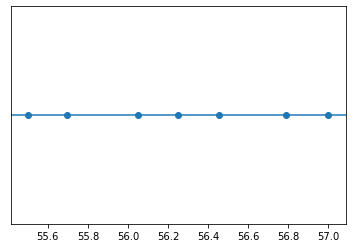

In [85]:
#On a piece of paper, mark these 7 scenarios for the average (including the original average) on the real line.
minmax_val = [min1,min2,min3,max1,max2,max3,curr_avg]

predictedY = minmax_val 

scatter = plt.scatter(minmax_val , np.zeros_like(minmax_val),cmap="hot_r", vmin=-10)

plt.axhline(y=0)
plt.yticks([])

plt.show()

No handles with labels found to put in legend.


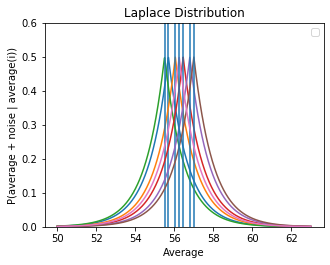

In [86]:
#Make the real line above the x-axis and draw a perpendicular y-axis. 
#Then draw 7 Laplacian distributions centered around each of these averages. 

fig, ax = plt.subplots(figsize=(5, 3.75))
delta = 1 
x = np.linspace(50, 63, 1000)
for mu in minmax_val:
    dist = laplace(mu, delta)
    plt.plot(x,dist.pdf(x)) 
    plt.axvline(x=mu)

plt.ylim(0, 0.6)
plt.xlabel('Average')
plt.ylabel('P(average + noise | average(i))')
plt.title('Laplace Distribution')

plt.legend()
plt.show()

In [93]:
#find distance from mean
minmax_nocurr = [min1,min2,min3,max1,max2,max3]
dist = []
for i in range(6):
    dist.append(abs(minmax_nocurr[i] - curr_avg))
print(dist)

[0.553797468354432, 0.20061728395062062, 0.75, 0.205696202531648, 0.540123456790127, 0.75]


In [90]:
#Number 1 Part 1
print("Minimum average if an individual in the database were excluded:")
min_1 = (45000-100)/799
print(min_1)
print("Maximum average if an individual in the database were excluded:")
max_1 = (45000-40)/799
print(max_1)

#Number 1 Part 2
print("Maximum average if an individual outside the database were included:")
max_2 = (45000+100)/801
print(max_2)
print("Minimum average if an individual outside the database were included:")
min_2 = (45000+40)/801
print(min_2)

#Number 1 Part 3
print("Maximum average if age of individual that is in the database was different:")
max_3 = (45000+60)/800
print(max_3)
print("Minimum average if age of individual that is in the database was different:")
min_3 = (45000-60)/800
print(min_3)

Minimum average if an individual in the database were excluded:
56.195244055068834
Maximum average if an individual in the database were excluded:
56.270337922403
Maximum average if an individual outside the database were included:
56.30461922596754
Minimum average if an individual outside the database were included:
56.22971285892634
Maximum average if age of individual that is in the database was different:
56.325
Minimum average if age of individual that is in the database was different:
56.175


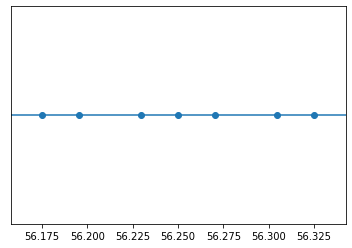

In [91]:
#On a piece of paper, mark these 7 scenarios for the average (including the original average) on the real line.
min_max_val = [min_1,min_2,min_3,max_1,max_2,max_3,curr_avg]

predicted_Y = min_max_val 

scatter_1 = plt.scatter(min_max_val , np.zeros_like(min_max_val),cmap="hot_r", vmin=-10)

plt.axhline(y=0)
plt.yticks([])

plt.show()

No handles with labels found to put in legend.


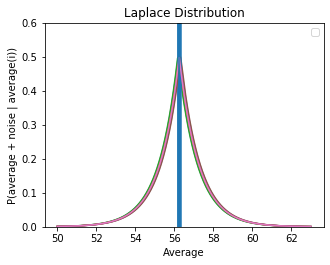

In [92]:
#Make the real line above the x-axis and draw a perpendicular y-axis. 
#Then draw 7 Laplacian distributions centered around each of these averages. 

fig, ax = plt.subplots(figsize=(5, 3.75))
delta = 1 
x = np.linspace(50, 63, 1000)
for mu in min_max_val:
    dist = laplace(mu, delta)
    plt.plot(x,dist.pdf(x)) 
    plt.axvline(x=mu)

plt.ylim(0, 0.6)
plt.xlabel('Average')
plt.ylabel('P(average + noise | average(i))')
plt.title('Laplace Distribution')

plt.legend()
plt.show()

In [95]:
#find dist from mean
min_max_nocurr = [min_1,min_2,min_3,max_1,max_2,max_3]
dist_1 = []
ratio = []
for i in range(6):
    dist_1.append(abs(min_max_nocurr[i] - curr_avg))
    
print(dist_1)

[0.05475594493116631, 0.020287141073659143, 0.07500000000000284, 0.020337922403001585, 0.054619225967542206, 0.07500000000000284]


Using the methodology from before, both min_3 and max_3 are have the largest distance away from the mean. Finding the largest Bi to minimize statisical pollution. Using the formula find that the best b value to be about 0.54. 

### Problem 4 

There are 2 regression datasets given to you: "group1.csv" and "group2.csv". Both have 2 attributes and no label. Load them and store them in $X_1$ and $X_2$, respectively. 

In [78]:
X1 = pd.read_csv('group1.csv', header = None)
X2 = pd.read_csv('group2.csv', header = None)

a) Run Linear Regression on each of the datasets. Are the coefficients positive or negative? Provide a plot for each dataset. 

X1 coeff:  [[0.89717851]]
X2 coeff:  [[1.15339068]]


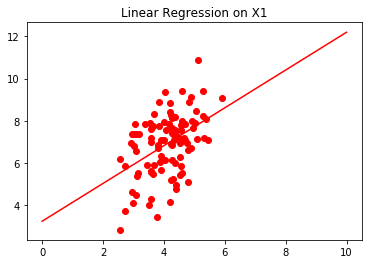

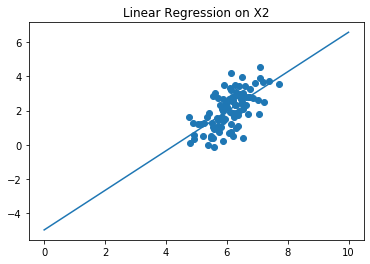

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

x_1 = X1[0].to_numpy()
y_1 = X1[1].to_numpy()
x_2 = X2[0].to_numpy()
y_2 = X2[1].to_numpy()

#instance of linear regression object
reg1 = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()

#fit linear model to data
reg1.fit(x_1[:, np.newaxis], y_1[:, np.newaxis])
reg2.fit(x_2[:, np.newaxis], y_2[:, np.newaxis])

#print parameters
print('X1 coeff: ', reg1.coef_)
print('X2 coeff: ', reg2.coef_)

#linear regression fit
model1 = LinearRegression(fit_intercept=True)
model2 = LinearRegression(fit_intercept=True)

model1.fit(x_1[:, np.newaxis], y_1)
model2.fit(x_2[:, np.newaxis], y_2)

#create x values, using model predict y values for line
xfit1 = np.linspace(0, 10, 1000)
yfit1 = model1.predict(xfit1[:, np.newaxis])

xfit2 = np.linspace(0, 10, 1000)
yfit2 = model2.predict(xfit2[:, np.newaxis])

plt.subplots()
plt.scatter(x_1, y_1,color = 'red')
plt.plot(xfit1, yfit1, color = 'red')
plt.title('Linear Regression on X1')

plt.subplots()
plt.scatter(x_2, y_2)
plt.plot(xfit2, yfit2)
plt.title('Linear Regression on X2')

plt.show()

The coefficients of both linear regressions are postive

b) Now combine both datasets into a single large dataset. Call this dataset $X$ ($X=X_1 \cup X_2$). Again, run Linear Regression on the combined dataset $X$. Is the coefficient positive or negative? Provide a plot. 

X3 coeff:  [[-1.38439504]]


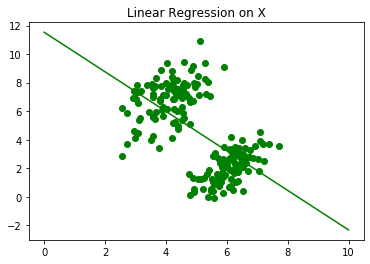

In [97]:
X = X1.append(X2)

x_3 = X[0]
y_3 = X[1]

reg3 = linear_model.LinearRegression()
reg3.fit(x_3[:, np.newaxis], y_3[:, np.newaxis])

print('X3 coeff: ', reg3.coef_)

#linear regression fit
model3 = LinearRegression(fit_intercept=True)

model3.fit(x_3[:, np.newaxis], y_3)

#create x values, using model predict y values for line
xfit3 = np.linspace(0, 10, 1000)
yfit3 = model3.predict(xfit3[:, np.newaxis])

plt.subplots()
plt.scatter(x_3, y_3, color = 'green')
plt.plot(xfit3, yfit3, color = 'green')
plt.title('Linear Regression on X')

plt.show()

c) What is the name of this illustrated paradox? What do the above results tell us about modeling the relationship between two variables in the presence of a missing attribute? To give you some intuition, imagine there is a third unobserved attribute $Z$ that has different values depending on which group an example belongs to. In other words, every data point in $X_1$ has $Z=1$ and every data point in $X_2$ has $Z=2$. Attribute $Z$ essentially partitions the whole dataset $X$ into 2 subsets $X_1$ and $X_2$.  

The name of the paradox is Simpson's Paradox, where it is a trend in Statistics and Probability where when groups are combined, trends change or even reverse, which in this case the coefficient of linear regressions reversed when combined. When combing datasets of two variables, a third missing attribute may be created, resulting in a large change in the relationship between the intial two variables.

### Problem 5

a.) No, W and Z are not independent as there is a path between W and Z through T.

b.) No, because if y is given, that assumes that t is also given, meaning there is a path between between W and Z through T.

c.) No, because if x is given, y is also given, which also implies t is given, meaning there is a path between W and Z through T

d.) Do(T=1), removes all incoming links to T and set its value to 1, therefore intervening on T. 

For a. they can be conditionally independent as Y is a blocker for path from W to Z through Y and V blocks from W through Y. 

For b. they are not conditionally independent as there is a path from W to X to Y then from Y though to Z. 

For c, they can be conditionally independent as there is a d-seperation of X from W and Y to Z. 